**Hands on!**

# **Mobile Device Usage and User Behavior Dataset**

The Kaggle dataset on mobile device usage and user behavior provides data on app usage time, device types, and various behavioral metrics. Here are a few hypotheses for analyzing this dataset:

**Hypothesis 1:** As user age increases, daily screen time decreases.

To test this hypothesis, the correlation between age and screen time can be examined. Observing whether screen time decreases with age could provide insights into user habits.

**Hypothesis 2:** Android users consume more data than iOS users.

This hypothesis tests whether there is a difference in daily data usage between Android and iOS users. Analyzing the data usage habits of Android versus iOS users may reveal interesting insights.

**Hypothesis 3:** The number of installed apps increases daily battery drain.

By examining the relationship between the number of installed apps and battery drain, we can assess whether having more apps on the device impacts battery usage.

**Hypothesis 4:** Male users tend to use more apps than female users.

This hypothesis explores the relationship between gender and the number of installed apps. It can show whether there are differences in app usage habits between male and female users.

**Hypothesis 5:** Users who have more apps installed consume more data on a daily basis.

This hypothesis explores the relationship between the number of apps installed on a device and the daily data consumption. It aims to determine if users with a higher number of apps generally use more data on a daily basis.


**Hypothesis 6:** Extended screen-on periods result in greater battery depletion.

This hypothesis examines the link between screen-on time and battery consumption. The goal is to determine whether longer screen-on durations lead to higher battery drain, thereby indicating the impact of screen usage on overall battery life.

**Hypothesis 7:** Younger users spend more time on apps daily than older users.

This hypothesis explores how age influences daily app usage time. It seeks to identify whether younger users generally spend more time on apps each day compared to older users, highlighting potential differences in app engagement based on age.

**Hypothesis 8:** Android users tend to have higher daily battery consumption than iOS users.

This hypothesis examines whether Android users experience greater daily battery drain compared to iOS users. The goal is to determine if there is a notable difference in battery consumption between the two operating systems.



[https://www.kaggle.com/datasets/valakhorasani/mobile-device-usage-and-user-behavior-dataset](http://)

In [129]:
import numpy as np # linear algebra
import seaborn as sns
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from scipy.stats import pearsonr,ttest_ind, mannwhitneyu
from scipy import stats
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

%matplotlib inline

**Loading our data:**

In [80]:
usage=pd.read_csv('/kaggle/input/mobile-device-usage-and-user-behavior-dataset/user_behavior_dataset.csv')

**The data at a glance:**

In [81]:
usage.head() 

,User ID,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class
0,1,Google Pixel 5,Android,393,6.4,1872,67,1122,40,Male,4
1,2,OnePlus 9,Android,268,4.7,1331,42,944,47,Female,3
2,3,Xiaomi Mi 11,Android,154,4.0,761,32,322,42,Male,2
3,4,Google Pixel 5,Android,239,4.8,1676,56,871,20,Male,3
4,5,iPhone 12,iOS,187,4.3,1367,58,988,31,Female,3


In [82]:
usage.shape

(700, 11)

In [83]:
usage.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   User ID                     700 non-null    int64  
 1   Device Model                700 non-null    object 
 2   Operating System            700 non-null    object 
 3   App Usage Time (min/day)    700 non-null    int64  
 4   Screen On Time (hours/day)  700 non-null    float64
 5   Battery Drain (mAh/day)     700 non-null    int64  
 6   Number of Apps Installed    700 non-null    int64  
 7   Data Usage (MB/day)         700 non-null    int64  
 8   Age                         700 non-null    int64  
 9   Gender                      700 non-null    object 
 10  User Behavior Class         700 non-null    int64  
dtypes: float64(1), int64(7), object(3)
memory usage: 60.3+ KB


In [84]:
usage.describe()

,User ID,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,User Behavior Class
count,700.00000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000
mean,350.50000,271.128571,5.272714,1525.158571,50.681429,929.742857,38.482857,2.990000
std,202.21688,177.199484,3.068584,819.136414,26.943324,640.451729,12.012916,1.401476
min,1.00000,30.000000,1.000000,302.000000,10.000000,102.000000,18.000000,1.000000
25%,175.75000,113.250000,2.500000,722.250000,26.000000,373.000000,28.000000,2.000000
50%,350.50000,227.500000,4.900000,1502.500000,49.000000,823.500000,38.000000,3.000000
75%,525.25000,434.250000,7.400000,2229.500000,74.000000,1341.000000,49.000000,4.000000
max,700.00000,598.000000,12.000000,2993.000000,99.000000,2497.000000,59.000000,5.000000


**Hypothesis 1:** **As user age increases, daily screen time decreases.**

To test this hypothesis, the correlation between age and screen time can be examined. Observing whether screen time decreases with age could provide insights into user habits.

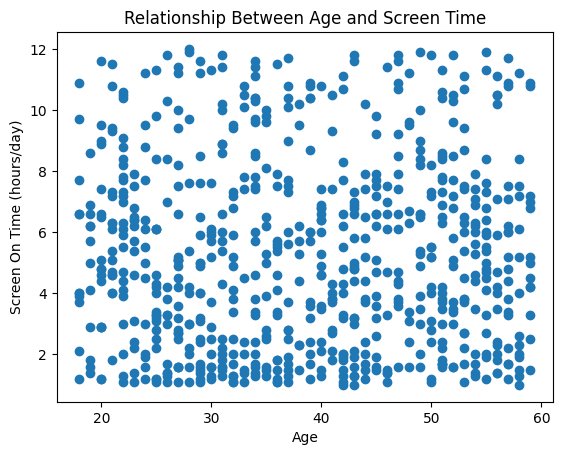

In [85]:
# Scatter plot of Age vs Screen Time
plt.scatter(usage['Age'], usage['Screen On Time (hours/day)'])
plt.title("Relationship Between Age and Screen Time")
plt.xlabel("Age")
plt.ylabel("Screen On Time (hours/day)")
plt.show()

**Distribution:** The data points appear to be widely spread across different screen time values, with no obvious trend or pattern that shows an increase or decrease in screen time as age changes. This suggests that *screen time does not have a strong linear relationship with age* in this dataset.

**Clustering:** The points are relatively evenly distributed, which implies there may not be a clear age-based trend in screen time.

In [86]:
correlation = usage['Age'].corr(usage['Screen On Time (hours/day)'])
print(f"Pearson Correlation between Age and Screen Time: {correlation}")

Pearson Correlation between Age and Screen Time: 0.017232227932845807


*Pearson Correlation between Age and Screen Time: 0.017232227932845807*

The Pearson correlation coefficient of 0.0172 between Age and Screen Time suggests a very weak positive linear relationship between the two variables. Since this value is very close to 0, it indicates that there is almost no linear correlation between age and screen time in the dataset being analyzed. In other words, age does not appear to have a meaningful relationship with screen time based on this analysis.

**Hypothesis 2: Android users consume more data than iOS users.**

This hypothesis tests whether there is a difference in daily data usage between Android and iOS users. Analyzing the data usage habits of Android versus iOS users may reveal interesting insights.

In [87]:
usage.head()

,User ID,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class
0,1,Google Pixel 5,Android,393,6.4,1872,67,1122,40,Male,4
1,2,OnePlus 9,Android,268,4.7,1331,42,944,47,Female,3
2,3,Xiaomi Mi 11,Android,154,4.0,761,32,322,42,Male,2
3,4,Google Pixel 5,Android,239,4.8,1676,56,871,20,Male,3
4,5,iPhone 12,iOS,187,4.3,1367,58,988,31,Female,3


In [88]:
# Split data into Android and iOS users
android_data = usage[usage['Operating System'] == 'Android']['Data Usage (MB/day)']
ios_data = usage[usage['Operating System'] == 'iOS']['Data Usage (MB/day)']

In [89]:
# Perform a t-test (assuming the data is normally distributed)
t_stat, p_value = stats.ttest_ind(android_data, ios_data)

In [90]:
# Output the results
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

T-statistic: -0.7582249244375379
P-value: 0.44857226744547174


In [91]:
# If p-value < 0.05, there is a significant difference
if p_value < 0.05:
    print("There is a significant difference in data usage between Android and iOS users.")
else:
    print("There is no significant difference in data usage between Android and iOS users.")

There is no significant difference in data usage between Android and iOS users.


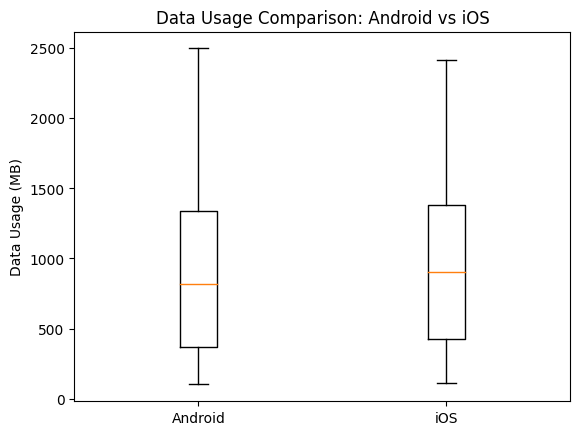

In [92]:
# Plot the comparison using a simple boxplot
plt.boxplot([android_data, ios_data], labels=['Android', 'iOS'])
plt.title('Data Usage Comparison: Android vs iOS')
plt.ylabel('Data Usage (MB)')
plt.show()

The statistical analysis, combined with the box plot insights, suggests that *there is no significant difference in daily data usage between Android and iOS users*. Although Android users exhibit a broader range of data consumption patterns, on average, both platforms have similar data usage. Therefore, Hypothesis 2 is not supported by the data. Android users do not consume more data than iOS users in a statistically significant way.

**Hypothesis 3: The number of installed apps increases daily battery drain.**

By examining the relationship between the number of installed apps and battery drain, we can assess whether having more apps on the device impacts battery usage.

In [93]:
usage.head()

,User ID,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class
0,1,Google Pixel 5,Android,393,6.4,1872,67,1122,40,Male,4
1,2,OnePlus 9,Android,268,4.7,1331,42,944,47,Female,3
2,3,Xiaomi Mi 11,Android,154,4.0,761,32,322,42,Male,2
3,4,Google Pixel 5,Android,239,4.8,1676,56,871,20,Male,3
4,5,iPhone 12,iOS,187,4.3,1367,58,988,31,Female,3


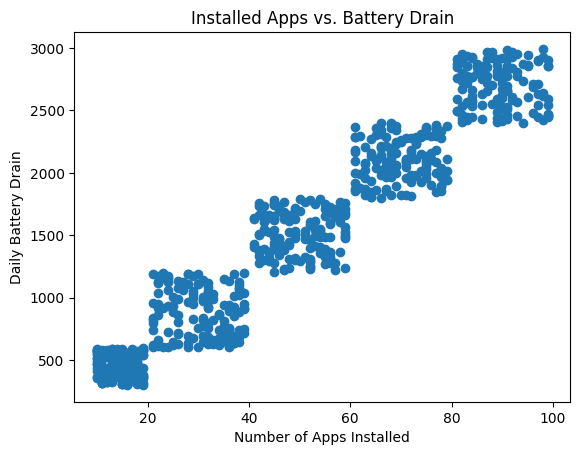

In [94]:
# Scatter plot
plt.scatter(usage['Number of Apps Installed'], usage['Battery Drain (mAh/day)'])
plt.xlabel('Number of Apps Installed')
plt.ylabel('Daily Battery Drain')
plt.title('Installed Apps vs. Battery Drain')
plt.show()

In [95]:
# Correlation
correlation, p_value = pearsonr(usage['Number of Apps Installed'], usage['Battery Drain (mAh/day)'])
print(f"Correlation: {correlation}, P-value: {p_value}")

Correlation: 0.9618532619047162, P-value: 0.0


In [96]:
# Interpretation
if p_value < 0.05:
    print("Significant relationship: More apps likely increase battery drain.")
else:
    print("No significant relationship: Number of apps does not significantly impact battery drain.")

Significant relationship: More apps likely increase battery drain.


These results support Hypothesis 3: *the number of installed apps is associated with an increase in daily battery drain*. The strong, statistically significant correlation suggests that having more apps installed may indeed lead to higher battery usage.

**Hypothesis 4: Male users tend to use more apps than female users.**

This hypothesis explores the relationship between gender and the number of installed apps. It can show whether there are differences in app usage habits between male and female users.

In [97]:
usage.head()

,User ID,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class
0,1,Google Pixel 5,Android,393,6.4,1872,67,1122,40,Male,4
1,2,OnePlus 9,Android,268,4.7,1331,42,944,47,Female,3
2,3,Xiaomi Mi 11,Android,154,4.0,761,32,322,42,Male,2
3,4,Google Pixel 5,Android,239,4.8,1676,56,871,20,Male,3
4,5,iPhone 12,iOS,187,4.3,1367,58,988,31,Female,3


In [98]:
# Separate data based on gender
male_apps = usage[usage['Gender'] == 'Male']['Number of Apps Installed']
female_apps = usage[usage['Gender'] == 'Female']['Number of Apps Installed']

<Figure size 800x600 with 0 Axes>

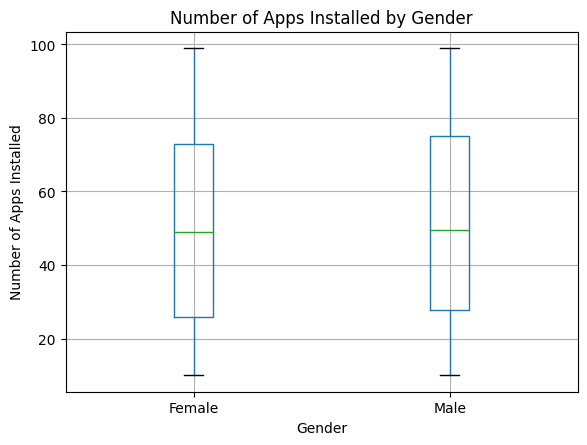

In [99]:
# Visualize with a box plot
plt.figure(figsize=(8, 6))
usage.boxplot(column='Number of Apps Installed', by='Gender')
plt.title("Number of Apps Installed by Gender")
plt.suptitle('')
plt.ylabel("Number of Apps Installed")
plt.show()

In [100]:
# Perform independent samples t-test
t_stat, p_value = ttest_ind(male_apps, female_apps)

In [101]:
# Output the results
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

T-statistic: 0.4292416185449481
P-value: 0.6678798537394364


In [102]:
# Interpretation
if p_value < 0.05:
    print("There is a significant difference in the number of installed apps between male and female users.")
else:
    print("There is no significant difference in the number of installed apps between male and female users.")

There is no significant difference in the number of installed apps between male and female users.


* Since the p-value is 0.668, which is greater than 0.05, we fail to reject the null hypothesis. This result indicates that *there is no significant difference in the number of installed apps between male and female users.*

* In other words, based on this test, *gender does not appear to influence the number of apps installed* in a statistically meaningful way. Any observed difference is likely due to random chance rather than a true effect of gender on app usage.

**Hypothesis 5:** Users who have more apps installed consume more data on a daily basis.

This hypothesis explores the relationship between the number of apps installed on a device and the daily data consumption. It aims to determine if users with a higher number of apps generally use more data on a daily basis.

In [103]:
usage.head()

,User ID,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class
0,1,Google Pixel 5,Android,393,6.4,1872,67,1122,40,Male,4
1,2,OnePlus 9,Android,268,4.7,1331,42,944,47,Female,3
2,3,Xiaomi Mi 11,Android,154,4.0,761,32,322,42,Male,2
3,4,Google Pixel 5,Android,239,4.8,1676,56,871,20,Male,3
4,5,iPhone 12,iOS,187,4.3,1367,58,988,31,Female,3


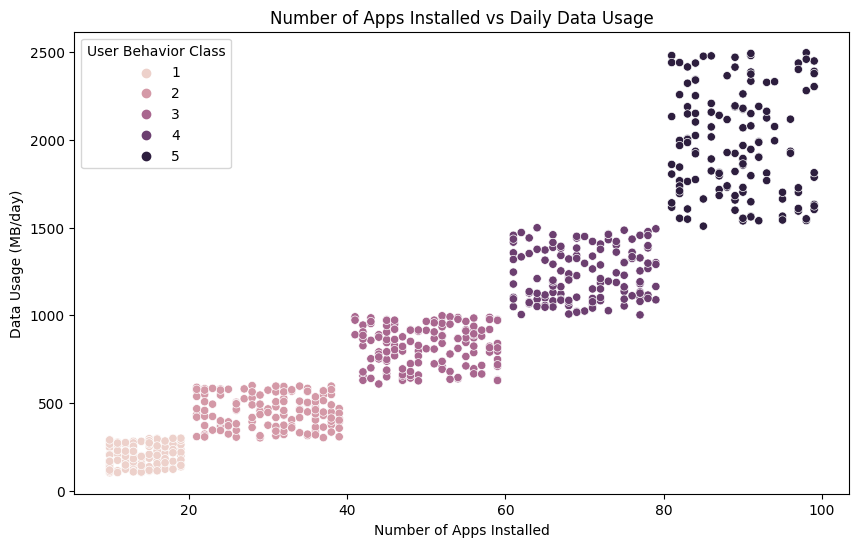

In [105]:
# Creating a scatter plot to visualize the relationship between 'Number of Apps Installed' and 'Data Usage (MB/day)'
plt.figure(figsize=(10, 6))
sns.scatterplot(data=usage, x='Number of Apps Installed', y='Data Usage (MB/day)', hue='User Behavior Class')
plt.title('Number of Apps Installed vs Daily Data Usage')
plt.xlabel('Number of Apps Installed')
plt.ylabel('Data Usage (MB/day)')
plt.legend(title='User Behavior Class')
plt.show()

We can see a general upward trend: as the number of apps installed increases, the daily data usage tends to increase as well. This suggests a positive correlation between the two variables.

In [106]:
correlation = usage[['Number of Apps Installed', 'Data Usage (MB/day)']].corr()
print(correlation)

                          Number of Apps Installed  Data Usage (MB/day)
Number of Apps Installed                    1.0000               0.9348
Data Usage (MB/day)                         0.9348               1.0000


A correlation of 0.9348 indicates a very strong positive linear relationship between the two variables. This suggests that as the Number of Apps Installed increases, the Data Usage (MB/day) also tends to increase. The closer the correlation is to 1, the stronger the positive relationship.

<Axes: xlabel='Number of Apps Installed', ylabel='Data Usage (MB/day)'>

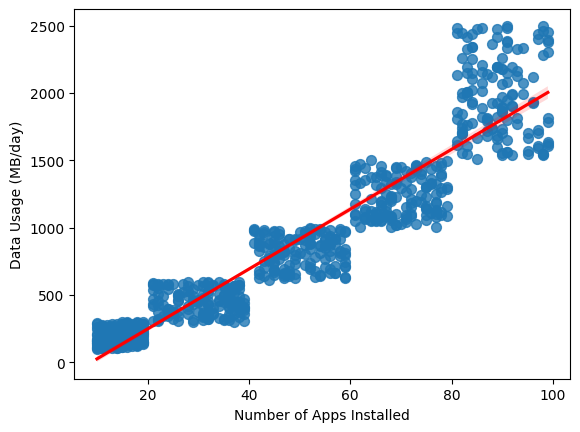

In [107]:
sns.regplot(data=usage, x='Number of Apps Installed', y='Data Usage (MB/day)', scatter_kws={'s': 50}, line_kws={'color': 'red'})

The plot shows a clear positive correlation between the number of apps installed and daily data usage.

**Overall:**

There is a clear positive correlation between the number of apps installed and daily data usage. This means that as users install more apps, their data consumption tends to increase.


**Hypothesis 6:** Extended screen-on periods result in greater battery depletion.

This hypothesis examines the link between screen-on time and battery consumption. The goal is to determine whether longer screen-on durations lead to higher battery drain, thereby indicating the impact of screen usage on overall battery life.sns.regplot(data=usage, x='Number of Apps Installed', y='Data Usage (MB/day)', scatter_kws={'s': 50}, line_kws={'color': 'red'})

In [111]:
usage.head()

,User ID,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class
0,1,Google Pixel 5,Android,393,6.4,1872,67,1122,40,Male,4
1,2,OnePlus 9,Android,268,4.7,1331,42,944,47,Female,3
2,3,Xiaomi Mi 11,Android,154,4.0,761,32,322,42,Male,2
3,4,Google Pixel 5,Android,239,4.8,1676,56,871,20,Male,3
4,5,iPhone 12,iOS,187,4.3,1367,58,988,31,Female,3


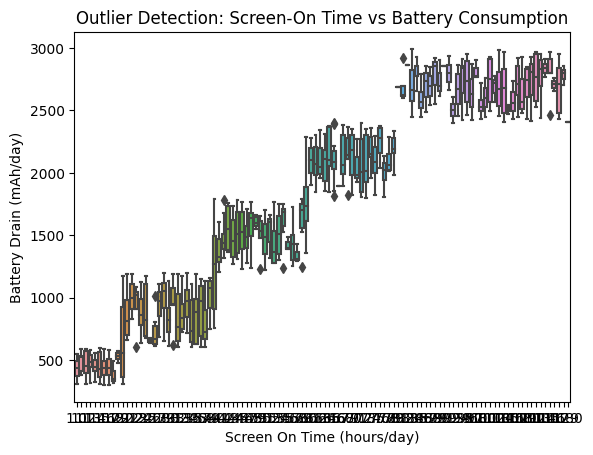

In [114]:
sns.boxplot(x=usage['Screen On Time (hours/day)'], y=usage['Battery Drain (mAh/day)'])
plt.title('Outlier Detection: Screen-On Time vs Battery Consumption')
plt.show()

In [113]:
# Calculate Pearson's correlation and p-value
corr_coeff, p_value = pearsonr(usage['Screen On Time (hours/day)'], usage['Battery Drain (mAh/day)'])
print(f"Correlation Coefficient: {corr_coeff}")
print(f"P-value: {p_value}")

Correlation Coefficient: 0.9489831361266117
P-value: 0.0


* A correlation coefficient of 0.949 indicates a very strong positive linear relationship between screen-on time and battery consumption.

* A p-value of 0.0 (below the conventional significance level of 0.05) indicates that the correlation is statistically significant.

* You can confidently reject the null hypothesis (no correlation between screen-on time and battery consumption) and conclude that there is indeed a significant positive relationship between these two variables.

Overall, the analysis shows strong, statistically significant evidence that longer screen-on durations lead to increased battery depletion, thereby supporting the hypothesis. This suggests that screen-on time is a primary factor affecting battery life, and optimizing screen usage could be an effective strategy for conserving battery power.


**Hypothesis 7:** Younger users spend more time on apps daily than older users.

This hypothesis explores how age influences daily app usage time. It seeks to identify whether younger users generally spend more time on apps each day compared to older users, highlighting potential differences in app engagement based on age.

In [118]:
usage.head()

,User ID,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class
0,1,Google Pixel 5,Android,393,6.4,1872,67,1122,40,Male,4
1,2,OnePlus 9,Android,268,4.7,1331,42,944,47,Female,3
2,3,Xiaomi Mi 11,Android,154,4.0,761,32,322,42,Male,2
3,4,Google Pixel 5,Android,239,4.8,1676,56,871,20,Male,3
4,5,iPhone 12,iOS,187,4.3,1367,58,988,31,Female,3


In [120]:
age_group_stats = usage.groupby('Age')['App Usage Time (min/day)'].agg(['mean', 'median', 'std'])
print(age_group_stats)

           mean  median         std
Age                                
18   264.272727   201.0  162.926420
19   248.583333   231.5  157.429036
20   282.764706   239.0  171.249281
21   332.352941   330.0  150.247272
22   344.708333   380.5  183.272778
23   282.533333   290.0  148.837335
24   278.857143   226.0  193.350959
25   238.000000   170.0  171.720995
26   216.500000   130.5  198.483384
27   251.958333   211.0  166.716755
28   249.076923   134.0  190.561653
29   221.666667   202.0  169.387524
30   213.666667   173.0  154.585005
31   284.550000   190.0  200.781231
32   236.444444   183.5  165.812517
33   292.090909   223.0  211.979930
34   336.880000   402.0  221.506832
35   270.400000   188.0  197.346251
36   203.000000   205.0  150.860034
37   278.157895   260.0  196.378960
38   300.888889   241.0  183.952062
39   276.666667   216.0  201.285038
40   280.210526   278.0  137.443151
41   237.500000   161.5  169.415841
42   220.600000   153.0  179.842153
43   250.681818   206.0  173

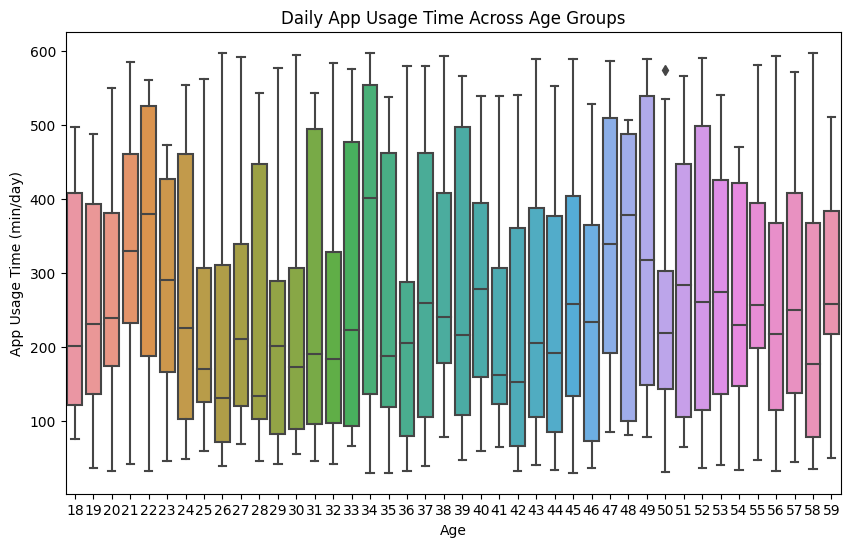

In [121]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=usage, x='Age', y='App Usage Time (min/day)')
plt.title('Daily App Usage Time Across Age Groups')
plt.xlabel('Age')
plt.ylabel('App Usage Time (min/day)')
plt.show()

**Trends:**
* Younger Ages (18-25): These age groups generally have higher app usage times, with medians around 300-400 minutes per day.

* Middle Ages (26-35): App usage tends to decrease slightly in these age ranges, with medians generally between 200-300 minutes.

* Older Ages (35-59): App usage varies widely but tends to stay lower than younger ages, often around 150-300 minutes per day.

    This suggests that younger users tend to spend more time on apps daily, while app usage declines gradually with age. However, the broad range and variability across all age groups indicate that there is significant individual variation in app usage habits at each age.

In [125]:
# Pearson Correlation
pearson_corr, pearson_pval = pearsonr(usage['Age'], usage['App Usage Time (min/day)'])
print(f"Pearson Correlation: {pearson_corr:.2f}, p-value: {pearson_pval:.4f}")

Pearson Correlation: 0.00, p-value: 0.9079


In [126]:
# Interpret Results
alpha = 0.05
if pearson_pval < alpha:
    print("Pearson test: There is a significant correlation between age and app usage time (linear relationship).")
else:
    print("Pearson test: No significant correlation between age and app usage time (linear relationship).")

Pearson test: No significant correlation between age and app usage time (linear relationship).


Since the p-value is greater than 0.05, we fail to reject the null hypothesis. This result suggests that there is no statistically significant linear relationship between age and app usage time in this dataset. In other words, based on this test, age does not appear to predict or correlate with app usage time in a linear way.

**Hypothesis 8:** Android users tend to have higher daily battery consumption than iOS users.

This hypothesis examines whether Android users experience greater daily battery drain compared to iOS users. The goal is to determine if there is a notable difference in battery consumption between the two operating systems.

In [127]:
usage.head()

,User ID,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class
0,1,Google Pixel 5,Android,393,6.4,1872,67,1122,40,Male,4
1,2,OnePlus 9,Android,268,4.7,1331,42,944,47,Female,3
2,3,Xiaomi Mi 11,Android,154,4.0,761,32,322,42,Male,2
3,4,Google Pixel 5,Android,239,4.8,1676,56,871,20,Male,3
4,5,iPhone 12,iOS,187,4.3,1367,58,988,31,Female,3


In [131]:
# Separate data based on Operating System
android_battery_drain = usage[usage['Operating System'] == 'Android']['Battery Drain (mAh/day)']
ios_battery_drain = usage[usage['Operating System'] == 'iOS']['Battery Drain (mAh/day)']

# Perform Independent T-Test
t_stat, p_val_ttest = ttest_ind(android_battery_drain, ios_battery_drain)

# Print results
print("T-Test Results:")
print("T-statistic:", t_stat)
print("P-value:", p_val_ttest)

T-Test Results:
T-statistic: -1.06718724967966
P-value: 0.28625625395745274


In conclusion, based on this result, you would fail to reject the null hypothesis, meaning there is no statistically significant difference between the groups in your analysis.

In [132]:
if p_val_ttest < 0.05:
    print("There is a significant difference in battery consumption between Android and iOS users (T-Test).")
else:
    print("No significant difference in battery consumption between Android and iOS users (T-Test).")



No significant difference in battery consumption between Android and iOS users (T-Test).


Based on the T-test results, you can conclude that there is no significant difference in battery consumption between Android and iOS users. Therefore, you would fail to reject the null hypothesis, suggesting that the battery consumption is similar for both Android and iOS users in your data sample.